
Created on Thu Mar 15 19:57:57 2018

@author: Gandhi

 Dataset :Echocardiogram.data

 This is Echocardiogram Dataset. This has published on 28 February 1989 in Miami. The donor of this dataset was Steven Salzberg and collector of this dataset was Dr. Evlin Kinney. Data source is uci.edu.
 
  All the patients suffered heart attacks at some point in the past.
      Some are still alive and some are not.  The survival and still-alive
      variables, when taken together, indicate whether a patient survived
      for at least one year following the heart attack.
 
 What am I going to predict?
 Is patient still alive or dead?
 
 Which categories of machine learning to use?
 1. Supervised learning
 2. Unsupervised learning
 3. Semi- supervised learning
 
 There is an outcome we are trying to predict -  Supervised learning
 
 These are the steps to classify the survival rate of the patient. 
 
 1.Find the data
 2.Apply a data science model
 3.Review the results
 


In [115]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from collections import Counter
from sklearn.metrics import *
import seaborn as sns; sns.set(font_scale=1.2)

In [116]:
#Loading your dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"

In [117]:
Echocardiogram_df = pd.read_csv(url, header= None, error_bad_lines=False, sep=',')
col = ["survival ", "still-alive", "age-at-heart-attack", "pericardial-effusion","fractional-shortening", "E-point septal separation", "left ventricular end-diastolic", "wall-motion-score","wall-motion-index","mult","name ",  "group ",  "alive-at-1" ]
Echocardiogram_df.columns = col
print ('Check first 5 rows of the table ')
print(Echocardiogram_df.head())

Check first 5 rows of the table 
  survival   still-alive age-at-heart-attack  pericardial-effusion  \
0        11            0                  71                     0   
1        19            0                  72                     0   
2        16            0                  55                     0   
3        57            0                  60                     0   
4        19            1                  57                     0   

  fractional-shortening E-point septal separation  \
0                 0.260                         9   
1                 0.380                         6   
2                 0.260                         4   
3                 0.253                    12.062   
4                 0.160                        22   

  left ventricular end-diastolic wall-motion-score wall-motion-index   mult  \
0                          4.600                14                 1      1   
1                          4.100                14             1.700 

b'Skipping line 50: expected 13 fields, saw 14\n'


In [118]:
# check the last 5 rows
print ('Check Last 5 rows of the table ')
print(Echocardiogram_df.tail())


Check Last 5 rows of the table 
    survival   still-alive age-at-heart-attack  pericardial-effusion  \
126       7.5            1                  64                     0   
127        41            0                  64                     0   
128        36            0                  69                     0   
129        22            0                  57                     0   
130        20            0                  62                     0   

    fractional-shortening E-point septal separation  \
126                  0.24                      12.9   
127                  0.28                      5.40   
128                  0.20                      7.00   
129                  0.14                      16.1   
130                  0.15                         0   

    left ventricular end-diastolic wall-motion-score wall-motion-index   mult  \
126                           4.72                12                 1  0.857   
127                           5.47        

In [119]:
# check the total number of rows and column
print ('Print total number of rows and columns ')
print (Echocardiogram_df.shape)

Print total number of rows and columns 
(131, 13)


In [120]:
print ('Print name of the columns ')
print(Echocardiogram_df.columns)


Print name of the columns 
Index(['survival ', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening',
       'E-point septal separation', 'left ventricular end-diastolic',
       'wall-motion-score', 'wall-motion-index', 'mult', 'name ', 'group ',
       'alive-at-1'],
      dtype='object')


In [121]:
Echocardiogram_df.drop(['E-point septal separation'],axis = 1, inplace= True)
print ('Print name of the columns ')
print(Echocardiogram_df.columns)

Print name of the columns 
Index(['survival ', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening',
       'left ventricular end-diastolic', 'wall-motion-score',
       'wall-motion-index', 'mult', 'name ', 'group ', 'alive-at-1'],
      dtype='object')


In [122]:
# remove the space between the words  
# Changing the (' ') into (_) in coulumn names

Echocardiogram_df.columns = Echocardiogram_df.columns.str.strip()
Echocardiogram_df.columns = Echocardiogram_df.columns.str.replace(' ','_')
Echocardiogram_df.columns = Echocardiogram_df.columns.str.replace('-','_')
Echocardiogram_df.columns = Echocardiogram_df.columns.str.replace('\n',' ')
print(Echocardiogram_df.columns)

Index(['survival', 'still_alive', 'age_at_heart_attack',
       'pericardial_effusion', 'fractional_shortening',
       'left_ventricular_end_diastolic', 'wall_motion_score',
       'wall_motion_index', 'mult', 'name', 'group', 'alive_at_1'],
      dtype='object')


In [123]:
print ('Check Type of the data ') 
print(Echocardiogram_df.dtypes)


Check Type of the data 
survival                          object
still_alive                        int64
age_at_heart_attack               object
pericardial_effusion               int64
fractional_shortening             object
left_ventricular_end_diastolic    object
wall_motion_score                 object
wall_motion_index                 object
mult                              object
name                              object
group                             object
alive_at_1                        object
dtype: object


In [124]:
Echocardiogram_df = Echocardiogram_df.replace('[?]', np.NaN, regex = True)
print(Echocardiogram_df.isnull().sum())

survival                           1
still_alive                        0
age_at_heart_attack                5
pericardial_effusion               0
fractional_shortening              7
left_ventricular_end_diastolic    10
wall_motion_score                  3
wall_motion_index                  1
mult                               3
name                               0
group                             22
alive_at_1                        57
dtype: int64


In [125]:
Echocardiogram_df.columns.tolist()
Echocardiogram_df.drop(['alive_at_1'],axis= 1, inplace= True)
print(Echocardiogram_df.columns)

Index(['survival', 'still_alive', 'age_at_heart_attack',
       'pericardial_effusion', 'fractional_shortening',
       'left_ventricular_end_diastolic', 'wall_motion_score',
       'wall_motion_index', 'mult', 'name', 'group'],
      dtype='object')


In [126]:
Echocardiogram_df.columns.tolist()

['survival',
 'still_alive',
 'age_at_heart_attack',
 'pericardial_effusion',
 'fractional_shortening',
 'left_ventricular_end_diastolic',
 'wall_motion_score',
 'wall_motion_index',
 'mult',
 'name',
 'group']

In [127]:
# Try to drop the row where 3 columns out of 6 columns have all NAN values. row 32 has 3 NAN values. we are expecting to drop this column.

print(Echocardiogram_df.dropna(subset=['age_at_heart_attack','fractional_shortening','left_ventricular_end_diastolic'],how ='all',inplace =True))

None


In [128]:
Echocardiogram_df =Echocardiogram_df[['survival', 'age_at_heart_attack','pericardial_effusion','fractional_shortening', 'left_ventricular_end_diastolic', 'wall_motion_index','still_alive']].astype(float)

print ('Check Type of the data ') 
print(Echocardiogram_df.dtypes)

Check Type of the data 
survival                          float64
age_at_heart_attack               float64
pericardial_effusion              float64
fractional_shortening             float64
left_ventricular_end_diastolic    float64
wall_motion_index                 float64
still_alive                       float64
dtype: object


In [129]:
#This is a medical data of the petients. I really don't want to assume and add values for missing number. But in this case i have only 130 observation so, I am replacing the NAN and removing the outliers for the purpose of learning. 

Echocardiogram_df ['age_at_heart_attack'] = Echocardiogram_df ['age_at_heart_attack'].astype(float)
Means = np.mean(Echocardiogram_df ['age_at_heart_attack'], axis=0)
print(Means)

62.813722222222225


In [130]:
Means_round = float(str(round(Means, 2)))
Echocardiogram_df ['age_at_heart_attack']=Echocardiogram_df ['age_at_heart_attack'].replace(np.nan, Means_round)

In [131]:
print(Echocardiogram_df ['fractional_shortening'].dtypes)
Echocardiogram_df ['fractional_shortening'] = Echocardiogram_df ['fractional_shortening'].astype(float)
Median = np.nanmedian(Echocardiogram_df.loc[:,"fractional_shortening"])
print(Median)

float64
0.20500000000000002


In [132]:
IsNan = np.isnan(Echocardiogram_df.loc[:,"fractional_shortening"])
print(IsNan.count())

130


In [133]:
print(Echocardiogram_df.loc[IsNan,"fractional_shortening"])

27   NaN
28   NaN
34   NaN
36   NaN
48   NaN
83   NaN
Name: fractional_shortening, dtype: float64


In [134]:
Echocardiogram_df.loc[IsNan,"fractional_shortening"] = Median

In [135]:
Echocardiogram_df ['left_ventricular_end_diastolic'] = Echocardiogram_df ['left_ventricular_end_diastolic'].astype(float)
Means = np.mean(Echocardiogram_df ['left_ventricular_end_diastolic'], axis=0)
print(Means)
Means_round = float(str(round(Means, 2)))
Echocardiogram_df ['left_ventricular_end_diastolic']=Echocardiogram_df ['left_ventricular_end_diastolic'].replace(np.nan, Means_round)

4.763157024793391


In [136]:
Echocardiogram_df ['survival'].fillna(method ='ffill', inplace =True)
# Check the missing value for columns now
print(Echocardiogram_df.isnull().sum())

survival                          0
age_at_heart_attack               0
pericardial_effusion              0
fractional_shortening             0
left_ventricular_end_diastolic    0
wall_motion_index                 1
still_alive                       0
dtype: int64


In [137]:
Echocardiogram_df ['wall_motion_index'].fillna(method ='ffill', inplace =True)

In [138]:
print(Echocardiogram_df.isnull().sum())

survival                          0
age_at_heart_attack               0
pericardial_effusion              0
fractional_shortening             0
left_ventricular_end_diastolic    0
wall_motion_index                 0
still_alive                       0
dtype: int64


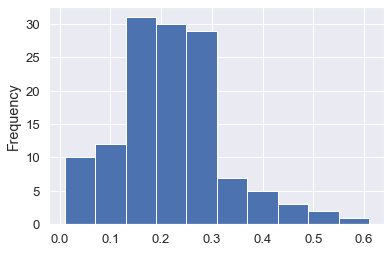

In [139]:
Echocardiogram_df ['fractional_shortening'].plot(kind ='hist')
plt.show()

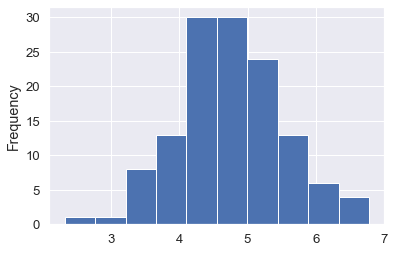

In [140]:
Echocardiogram_df ['left_ventricular_end_diastolic'].plot(kind ='hist')
plt.show()


def outliers(data):
    q1= np.percentile(data,25)
    q3 = np.percentile(data,75)
    lower = q1-1.5*(q3-q1)
    upper = q1+1.5*(q3-q1)
    flag =(data <= lower)|(data >= upper)
    q2 = np.median  
    
Echocardiogram_df ['fractional_shortening'] = outliers (Echocardiogram_df ['fractional_shortening'])
Echocardiogram_df ['left_ventricular_end_diastolic']= outliers (Echocardiogram_df ['left_ventricular_end_diastolic'])
Echocardiogram_df.head(25)    

In [141]:
x= np.ravel(Echocardiogram_df ['fractional_shortening'])
X= pd.DataFrame(x)

In [142]:
data =  MinMaxScaler().fit_transform(X)
Echocardiogram_df ['fractional_shortening']=data
print(Echocardiogram_df ['fractional_shortening'])

0      0.416667
1      0.616667
2      0.416667
3      0.405000
4      0.250000
         ...   
126    0.383333
127    0.450000
128    0.316667
129    0.216667
130    0.233333
Name: fractional_shortening, Length: 130, dtype: float64


In [143]:
x= np.ravel(Echocardiogram_df ['left_ventricular_end_diastolic'])
X= pd.DataFrame(x)
data =  MinMaxScaler().fit_transform(X)
Echocardiogram_df ['left_ventricular_end_diastolic']=data
print(Echocardiogram_df ['left_ventricular_end_diastolic'])

0      0.511211
1      0.399103
2      0.246637
3      0.511883
4      0.769058
         ...   
126    0.538117
127    0.706278
128    0.612108
129    0.457399
130    0.491031
Name: left_ventricular_end_diastolic, Length: 130, dtype: float64


In [144]:
x= np.ravel(Echocardiogram_df ['wall_motion_index'])
X= pd.DataFrame(x)
data =  MinMaxScaler().fit_transform(X)
Echocardiogram_df ['wall_motion_index']=data
print(Echocardiogram_df ['wall_motion_index'])


0      0.0000
1      0.3500
2      0.0000
3      0.2250
4      0.6250
        ...  
126    0.0000
127    0.0500
128    0.1050
129    0.1800
130    0.2045
Name: wall_motion_index, Length: 130, dtype: float64


In [145]:
Echocardiogram_df.head(25).round(3)


,survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,left_ventricular_end_diastolic,wall_motion_index,still_alive
0,11.00,71.000,0.0,0.417,0.511,0.000,0.0
1,19.00,72.000,0.0,0.617,0.399,0.350,0.0
2,16.00,55.000,0.0,0.417,0.247,0.000,0.0
3,57.00,60.000,0.0,0.405,0.512,0.225,0.0
4,19.00,57.000,0.0,0.250,0.769,0.625,1.0
5,26.00,68.000,0.0,0.417,0.446,0.000,0.0
6,13.00,62.000,0.0,0.367,0.697,0.438,0.0
7,50.00,60.000,0.0,0.533,0.657,0.000,0.0
8,19.00,46.000,0.0,0.550,0.621,0.070,0.0
9,25.00,54.000,0.0,0.217,0.487,0.095,0.0


In [146]:
# let's reduce this range appling the binning to get more accuracy on the result.
NB =5
bounds = np.linspace(np.min(x), np.max(x), NB + 1) 
x= np.ravel(Echocardiogram_df ['survival'])
X= pd.DataFrame(x)

bounds = np.linspace(np.min(x), np.max(x), NB + 1)
print (bounds)


[3.0000e-02 1.1424e+01 2.2818e+01 3.4212e+01 4.5606e+01 5.7000e+01]


In [147]:
def bin(x, b): 
    nb = len(b)
    N = len(x)
    y = np.empty(N, int) 
    
    for i in range(1, nb):
        y[(x >= bounds[i-1])&(x < bounds[i])] = i
    
    y[x == bounds[-1]] = nb - 1
    return y

bx = bin(x, bounds)
print ("\n\nBinned variable x, for ", NB, "bins\n")
print ("Bin boundaries: ", bounds)
print ("Binned variable: ", bx)



Binned variable x, for  5 bins

Bin boundaries:  [3.0000e-02 1.1424e+01 2.2818e+01 3.4212e+01 4.5606e+01 5.7000e+01]
Binned variable:  [1 2 2 5 2 3 2 5 2 3 1 5 5 4 1 3 1 1 2 1 1 1 1 1 5 3 3 3 1 4 1 1 3 4 3 2 1
 2 3 3 2 4 5 1 4 2 2 1 1 1 1 2 1 1 4 2 5 4 3 1 3 1 2 5 1 5 5 4 1 3 3 4 3 2
 1 1 2 3 3 3 3 1 1 3 1 2 5 2 1 4 5 3 3 3 4 3 1 1 3 3 2 3 1 3 3 3 1 1 3 2 4
 3 3 3 4 3 3 3 2 4 3 2 4 2 2 1 4 4 2 2]


In [148]:
Echocardiogram_df['survival'] = bx

In [149]:
NB =5
bounds = np.linspace(np.min(x), np.max(x), NB + 1) 
x= np.ravel(Echocardiogram_df ['age_at_heart_attack'])
X= pd.DataFrame(x)

bounds = np.linspace(np.min(x), np.max(x), NB + 1)
print (bounds)

def bin(x, b): 
    nb = len(b)
    N = len(x)
    y = np.empty(N, int) 
    
    for i in range(1, nb):
        y[(x >= bounds[i-1])&(x < bounds[i])] = i
    
    y[x == bounds[-1]] = nb - 1
    return y

bx = bin(x, bounds)
print ("\n\nBinned variable x, for ", NB, "bins\n")
print ("Bin boundaries: ", bounds)
print ("Binned variable: ", bx)

Echocardiogram_df['age_at_heart_attack'] = bx

[35.  45.2 55.4 65.6 75.8 86. ]


Binned variable x, for  5 bins

Bin boundaries:  [35.  45.2 55.4 65.6 75.8 86. ]
Binned variable:  [4 4 2 3 3 4 3 3 2 2 5 3 4 3 3 2 4 3 4 4 4 5 4 4 3 2 1 2 4 2 3 2 2 3 3 3 3
 4 5 2 4 5 3 4 3 5 3 3 3 3 3 3 3 4 3 3 4 4 5 4 4 3 4 2 2 4 3 5 5 3 3 3 2 2
 4 3 3 3 3 2 3 5 3 2 4 4 2 3 4 3 3 2 3 3 4 3 3 3 2 4 4 3 3 3 3 3 5 3 3 4 3
 3 3 3 3 2 3 3 3 3 3 3 2 3 3 3 3 4 3 3]


In [150]:
#Now we can see from the graph, outliers has been removed from columns 
Echocardiogram_df.head(25).head(3)
Echocardiogram_df.round(3)

,survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,left_ventricular_end_diastolic,wall_motion_index,still_alive
0,1,4,0.0,0.417,0.511,0.000,0.0
1,2,4,0.0,0.617,0.399,0.350,0.0
2,2,2,0.0,0.417,0.247,0.000,0.0
3,5,3,0.0,0.405,0.512,0.225,0.0
4,2,3,0.0,0.250,0.769,0.625,1.0
...,...,...,...,...,...,...,...
126,1,3,0.0,0.383,0.538,0.000,1.0
127,4,3,0.0,0.450,0.706,0.050,0.0
128,4,4,0.0,0.317,0.612,0.105,0.0
129,2,3,0.0,0.217,0.457,0.180,0.0


'\nIn below graph, i can clearly see most the points are collected to the one part of the graph. This is another way to indicate that these columns are playing important role in the model.\n'

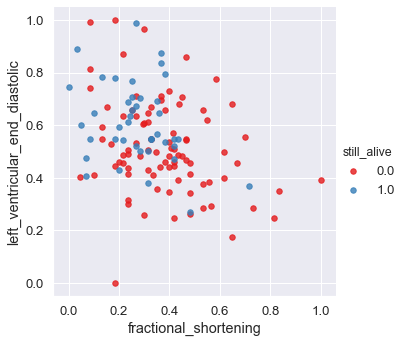

In [151]:
# I found my data.Next step is apply data science model.Now In order to **build a model**, the features must be **numeric**, and every observation must have the **same features in the same order**. Let's visualize the data first.to get the more ideas about columns.

# In the below graph I can clearly see that still_alive patients have less fractional_shortening number and high LVED


sns.lmplot('fractional_shortening','left_ventricular_end_diastolic',  data=Echocardiogram_df, hue='still_alive',
           palette='Set1', fit_reg=False, scatter_kws={"s": 30});

'''
In below graph, i can clearly see most the points are collected to the one part of the graph. This is another way to indicate that these columns are playing important role in the model.
'''

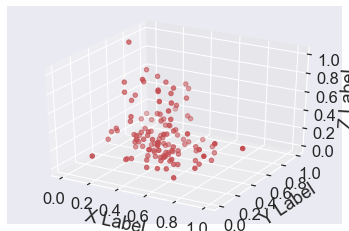

In [158]:
#from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =(Echocardiogram_df ['fractional_shortening'])
y =(Echocardiogram_df ['left_ventricular_end_diastolic'])
z =(Echocardiogram_df ['wall_motion_index'])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
sns.lmplot('fractional_shortening','left_ventricular_end_diastolic',  data=Echocardiogram_df, hue='still_alive',
           palette='Set1', fit_reg=False, scatter_kws={"s": 30});



'''
 Now 2 part - Apply a data science model
 
 I know that I need to use Supervised learning
 My main Question was "How do I choose which below model to use for my supervised learning task?"
 
 Support Vector Machines
 linear regression
 logistic regression
 naive Bayes
 decision trees
 k-nearest neighbor algorithm
 
 Solution: Model evaluation procedures - It helps to find the best model that represents our data and how well the chosen model will work in the future.
 
 Let's start:
 
 Stage 1: The first Requirement is "Features and response are separate objects" 
 So let's Define the input features and target column
 
'''

In [161]:

#define X and y
X= Echocardiogram_df[['survival','age_at_heart_attack','pericardial_effusion','fractional_shortening','left_ventricular_end_diastolic', 'wall_motion_index']].values
y= Echocardiogram_df['still_alive']

In [163]:
#Split the dataset into two pieces: a training set and a testing set.
# Train the model on the training set.
# Test the model on the testing set, and evaluate how well we did.
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size =.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(91, 6)
(39, 6)
(91,)
(39,)


'''
 How to apply Model?
 
 Step 1. Import the model you want to use
 
 Step 2. Make an instance of the Model
 
 Step 3. Training the model on the data, storing the information learned from the data
 
 Step 4. Predict labels for new data (new images)

 Appling Model -KNN
 Make an instance of Estimator
'''

In [164]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
print(knn)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.8205128205128205


In [165]:
#Repeat for KNN with K=1:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
print(knn)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [166]:
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7948717948717948


In [167]:
#Repeat for KNN with K=2:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
print(knn)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
0.8461538461538461


'''
Accuracy is better with K = 2 so we can use K=2 to predict the target in our dataset. But what if you have big data? For KNN models, complexity is determined by the value of K (lower value = more complex). Let's see if we can use other function to determine the value of K
See if we can locate value for K using function?
'''

In [168]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

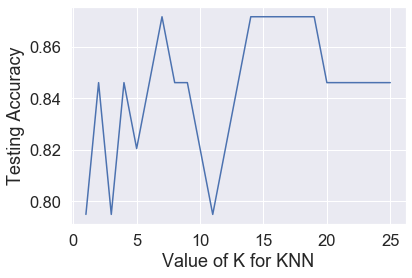

In [169]:

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [170]:
# Graph shows that I can pick any number between 13 to 23. let's take K = 15
#Repeat for KNN with K=15:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
print(knn)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')
0.8717948717948718


In [171]:
# Create a function to guess when a patient is alive or dead
def Alive_or_Dead(survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index):
    
    if(knn.predict([[survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index]]))==0:
        print('You\'re looking at a Alive person!')
    else:
        print('You\'re looking at a Dead person!')

In [172]:
# Predict if person is alive or not
Alive_or_Dead(3,1,.1,.448,.22,.135)

You're looking at a Alive person!


In [173]:
# compare actual response values (y_test) with predicted response values (y_pred)
AR =accuracy_score(y_test, y_pred)
print(AR)


print(confusion_matrix(y_test, y_pred))

0.8717948717948718
[[28  2]
 [ 3  6]]


In [174]:
CM_log = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP )

28 2 3 6


In [175]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))


0.8717948717948718
0.8717948717948718


In [176]:
#Classification Error: Overall, how often is the classifier incorrect?

print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_pred))

0.1282051282051282
0.1282051282051282


In [177]:
#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.6666666666666666
0.6666666666666666


In [178]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.75
0.75


In [179]:
# ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
print(roc_auc_score(y_test, y_pred))
#f1_score
print(f1_score(y_test, y_pred))

0.7999999999999999
0.7058823529411765


In [180]:
# Store the predicted probabilities for class 1
y_pred_prob = knn.predict_proba(X_test)[:, 1]
print(y_pred_prob)


[0.06666667 0.06666667 0.46666667 0.33333333 0.8        0.06666667
 0.06666667 0.33333333 0.13333333 0.4        0.8        0.06666667
 0.06666667 0.86666667 0.06666667 0.33333333 0.93333333 0.13333333
 0.4        0.13333333 0.26666667 0.13333333 0.33333333 0.13333333
 0.         0.06666667 0.86666667 0.06666667 0.06666667 0.46666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.13333333 0.86666667
 0.53333333 0.06666667 0.6       ]


In [181]:
#ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, y_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))


TP rates: [0.   0.11 0.33 0.44 0.67 0.67 0.78 0.89 0.89 0.89 1.   1.  ]

FP rates: [0.   0.   0.03 0.07 0.07 0.13 0.17 0.27 0.3  0.5  0.97 1.  ]

Probability thresholds: [1.93 0.93 0.87 0.8  0.53 0.47 0.4  0.33 0.27 0.13 0.07 0.  ]


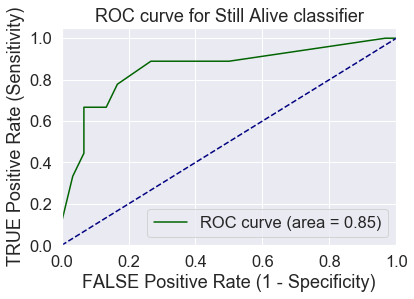

In [182]:
plt.figure()
plt.title('ROC curve for Still Alive classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [183]:
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_pred_prob), 2), "\n")


AUC score (using auc function): 0.85

AUC score (using roc_auc_score function): 0.85 



In [184]:
# Using a different classification model --Linear regression 

# Linear regression is a simple machine learning method that you can use to predict an observation's value based on the relationship between the target variable and independent, linearily related numeric predictive features.
# import the class
from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
# train a logistic regression model on the training set
logreg = LogisticRegression()
# fit the model with data --Model is learning the relationship between X and y
logreg.fit(X_train,y_train)

#  make predictions on the testing set
y_pred = logreg.predict(X_test)
print(y_pred)


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1.]


In [185]:
# Classification accuracy: percentage of correct predictions
# compare actual response values (y_test) with predicted response values (y_pred)
AR =accuracy_score(y_test, y_pred)
print(AR)

# each row of this matrix corresponds to each one of the classes of the dataset
print ("Coefficients:")
print (logreg.coef_)

# each element of this vector corresponds to each one of the classes of the dataset
print ("Intercept:")
print (logreg.intercept_)


# print the first 15 true and predicted responses
print('True:', y_test[0:15])
print('Pred:', y_pred[0:15])

0.8461538461538461
Coefficients:
[[-1.90211253  0.51470374  0.34267436 -0.92233659  0.35073447  0.27813933]]
Intercept:
[1.65487549]
True: 109    0.0
106    0.0
36     0.0
125    0.0
54     0.0
70     0.0
94     0.0
47     1.0
55     0.0
122    0.0
31     1.0
43     0.0
78     0.0
89     1.0
112    0.0
Name: still_alive, dtype: float64
Pred: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


In [186]:
# Classification accuracy is the easiest classification metric to understand
# but it does not tell you what "types" of errors your classifier is making.
# so we are using the Table that describes the performance of a classification model called as Confusion matrix.

# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(confusion_matrix(y_test, y_pred))


[[27  3]
 [ 3  6]]


In [187]:
CM_log = confusion_matrix(y_test, y_pred)

TN, FP, FN, TP = CM_log.ravel()
print(TN, FP, FN, TP)

27 3 3 6


In [188]:
#Classification Accuracy: Overall, how often is the classifier correct?
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

#Classification Error: Overall, how often is the classifier incorrect?
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - accuracy_score(y_test, y_pred))

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.8461538461538461
0.8461538461538461
0.15384615384615385
0.15384615384615385
0.6666666666666666
0.6666666666666666


In [189]:
#Precision: When a positive value is predicted, how often is the prediction correct?
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.6666666666666666
0.6666666666666666


In [190]:
#f1_score
print(f1_score(y_test, y_pred))


0.6666666666666666


In [191]:
# Store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]


In [192]:
# ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# IMPORTANT: first argument is true values,second argument is predicted probabilities

print(roc_auc_score(y_test, y_pred_prob))

0.8814814814814815


In [193]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, y_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))
#####################


TP rates: [0.   0.   0.22 0.22 0.56 0.56 0.67 0.67 0.78 0.78 0.89 0.89 1.   1.  ]

FP rates: [0.   0.03 0.03 0.07 0.07 0.1  0.1  0.13 0.13 0.17 0.17 0.4  0.4  1.  ]

Probability thresholds: [1.89 0.89 0.86 0.84 0.62 0.57 0.56 0.44 0.43 0.42 0.4  0.12 0.11 0.  ]


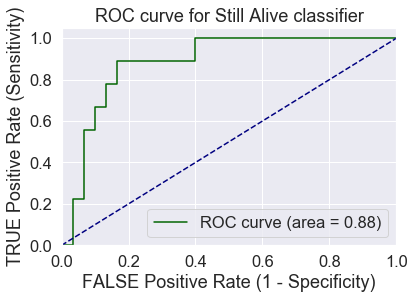

In [194]:
plt.figure()
plt.title('ROC curve for Still Alive classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()


In [195]:
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_pred_prob), 2), "\n")


AUC score (using auc function): 0.88

AUC score (using roc_auc_score function): 0.88 



In [196]:
# Create a function to guess when a patient is alive or dead
def Alive_or_Dead(survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index):
    
    if(logreg.predict([[survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index]]))==0:
        print('You\'re looking at a Alive person!')
    else:
        print('You\'re looking at a Dead person!')
# Predict if person is alive or not
Alive_or_Dead(3,1,.1,.448,.22,.135)

You're looking at a Alive person!


In [197]:
#define a function that accepts a threshold and prints sensitivity and specificity

def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][1])
    print('Specificity:', 1 - fpr[thresholds > threshold][1])
   

In [198]:
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
# Choice of classifier with parameters
t = 0.001 # tolerance parameter
kp = 'rbf' # kernel parameter
clf = svm.SVC(kernel='linear', probability=True)
#clf = SVC(kernel='linear', tol=t, probability=True,C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3)
Still_alive = clf.fit(X_train, y_train)
print(Still_alive)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [199]:
# Create a function to guess when a patient is alive or dead
def Alive_or_Dead(survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index):
    
    if(clf .predict([[survival,age_at_heart_attack,pericardial_effusion,fractional_shortening,
left_ventricular_end_diastolic,wall_motion_index]]))==0:
        print('You\'re looking at a Alive person!')
    else:
        print('You\'re looking at a Dead person!')
# Predict if person is alive or not
Alive_or_Dead(3,1,.1,.448,.22,.135)

You're looking at a Alive person!


In [200]:
# make class predictions for X_test_dtm
print ("predictions for test set:")
y_pred = clf.predict(X_test)
print(y_pred)
print ('actual class values:')
print (y_test)


predictions for test set:
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
actual class values:
109    0.0
106    0.0
36     0.0
125    0.0
54     0.0
70     0.0
94     0.0
47     1.0
55     0.0
122    0.0
31     1.0
43     0.0
78     0.0
89     1.0
112    0.0
124    0.0
17     1.0
59     0.0
4      1.0
68     0.0
56     0.0
45     0.0
52     0.0
34     0.0
84     0.0
118    0.0
83     1.0
12     0.0
2      0.0
63     0.0
79     0.0
114    0.0
117    1.0
57     0.0
90     0.0
60     0.0
86     1.0
91     0.0
46     1.0
Name: still_alive, dtype: float64


In [201]:
#calculate accuracy of class predictions
AR = accuracy_score(y_test, y_pred)
print(AR)

0.8205128205128205


In [202]:
# each row of this matrix corresponds to each one of the classes of the dataset
print ("Coefficients:")
print (clf.coef_)

Coefficients:
[[-1.99928891e+00  6.47649515e-05  8.87543913e-04 -2.82933072e-03
   2.15305614e-04 -7.96079748e-04]]


In [203]:
# each element of this vector corresponds to each one of the classes of the dataset
print ("Intercept:")
print (clf.intercept_)

Intercept:
[2.99992577]


In [204]:
# print the first 15 true and predicted responses
print('True:', y_test[0:15])
print('Pred:', y_pred[0:15])


True: 109    0.0
106    0.0
36     0.0
125    0.0
54     0.0
70     0.0
94     0.0
47     1.0
55     0.0
122    0.0
31     1.0
43     0.0
78     0.0
89     1.0
112    0.0
Name: still_alive, dtype: float64
Pred: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.]


In [205]:
# print the confusion matrix
confusion_matrix(y_test, y_pred)

array([[28,  2],
       [ 5,  4]], dtype=int64)

In [206]:
# print message text for the false negatives (spam incorrectly classified as ham)
print(X_test[y_pred < y_test])


[[2.         3.         0.         0.03333333 0.89013453 0.155     ]
 [2.         3.         0.         0.25       0.7690583  0.625     ]
 [3.         3.         1.         0.38333333 0.79372197 0.475     ]
 [2.         4.         1.         0.25       0.65695067 0.        ]
 [2.         5.         0.         0.18333333 0.5470852  0.125     ]]


In [207]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
y_pred_prob

array([3.94900659e-02, 3.95250765e-02, 2.81530702e-01, 2.81369791e-01,
       7.93859559e-01, 3.94854857e-02, 3.94747971e-02, 2.81498687e-01,
       4.04375472e-03, 2.81476838e-01, 7.94087312e-01, 4.10595724e-04,
       3.94970188e-02, 7.93969851e-01, 3.94948878e-02, 2.81439572e-01,
       7.94124778e-01, 3.95080976e-02, 2.81264379e-01, 4.04602274e-03,
       2.81362672e-01, 4.04341215e-03, 2.81201563e-01, 4.04243251e-03,
       3.95062503e-02, 3.94877958e-02, 7.93810761e-01, 4.10635431e-04,
       2.81229413e-01, 2.81642288e-01, 3.95281537e-02, 3.95248951e-02,
       3.95127302e-02, 4.10931335e-04, 4.04008930e-03, 7.93986333e-01,
       2.81594104e-01, 4.10574926e-04, 2.81418930e-01])

In [208]:
#calculate AUC
roc_auc_score(y_test, y_pred_prob)

#Sensitivity: When the actual value is positive, how often is the prediction correct?
#How "sensitive" is the classifier to detecting positive instances?
print(recall_score(y_test, y_pred))

0.4444444444444444


In [209]:
# ROC analysis
LW = 1.5 # line width for plots
LL = "lower right" # legend location
LC = 'darkgreen' # Line Color

fpr, tpr, th = roc_curve(y_test, y_pred_prob) # False Positive Rate, True Posisive Rate, probability thresholds
AUC = auc(fpr, tpr)
print ("\nTP rates:", np.round(tpr, 2))
print ("\nFP rates:", np.round(fpr, 2))
print ("\nProbability thresholds:", np.round(th, 2))


TP rates: [0.   0.11 0.22 0.22 0.33 0.33 0.44 0.44 0.56 0.56 0.67 0.67 0.78 0.78
 0.89 0.89 1.   1.  ]

FP rates: [0.   0.   0.   0.03 0.03 0.07 0.07 0.1  0.1  0.13 0.13 0.2  0.2  0.27
 0.27 0.43 0.43 1.  ]

Probability thresholds: [1.79 0.79 0.79 0.79 0.79 0.79 0.79 0.28 0.28 0.28 0.28 0.28 0.28 0.28
 0.28 0.04 0.04 0.  ]


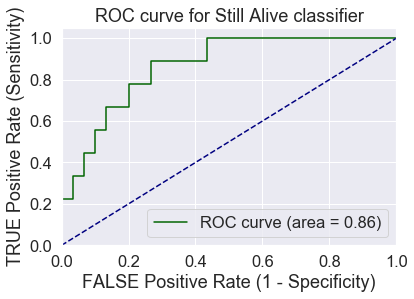

In [210]:
plt.figure()
plt.title('ROC curve for Still Alive classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FALSE Positive Rate (1 - Specificity)')
plt.ylabel('TRUE Positive Rate (Sensitivity)')
plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
plt.legend(loc=LL)
plt.show()

In [211]:
print ("\nAUC score (using auc function):", np.round(AUC, 2))
print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(y_test, y_pred_prob), 2), "\n")


AUC score (using auc function): 0.86

AUC score (using roc_auc_score function): 0.86 



'''
 Let's collect the data and compare their results now. 
  
 True positive: Still alive people correctly identified as Still alive 
  False positive: Dead people incorrectly identified as Alive 
  True negative: Dead people correctly identified as dead
  IMP : False negative: Alive people incorrectly identified as Dead
  In medical field,
 Still alive people incorrectly identified as dead is not acceptable. False Negative value for KNN and LR is 3 and for SVC is 5
  Because false positives ( Dead people incorrectly identified as Alive) are more acceptable than false negatives ( Alive people incorrectly identified as Dead)
  sensitivity is important in this case.
 
 sensitivity for KNN is .66
 sensitivity for LR is .66
 Asensitivity for SVC is .44
 
 Now I will check the accuracy.
 
 I will choose the KNN model in this case.
'''